# **Loading The Data**

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from imblearn.under_sampling import RandomUnderSampler  




*   Numpy stands for "numerical python".It is a python library used for working with arrays. In python lists are used which are slow which is why Numpy provides an array object called "ndarray" which is faster than lists.Numpy arrays are stored in one continuous place in memory unlike lists and are hence faster.
* The name pandas has reference to both "panel data" and "python data analysis".It is a python library used to work with datasets.It is used to clean messy datasets,analyse(eg:- find if there is a relation between two columns in the dataset,delete the useless or empty columns etc) and manipulate the data in the datasets.

* matplotlib is a visualization library in python.Using this we can plot various 2D graphs for the Numpy array objects.
* sklearn is a python library for machine learning. It provides various tools for machine learning and statistical modelling(eg:- regression,clustering,dimensionality reduction via a consistence interface in python)

*   Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting. 




*   Ada boost consists of a forest of stumps(trees with only 2 children),ada boost combines the weak learners(stumps).Some stumps get more say than others.(in random forest classifier,each tree had the same say in classification.).Each stump is made by taking the previous stumps mistakes into consideration.(in random forest each stump is independent of the other.)
*   Gradient boosting classifiers are a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model.


*   RandomUnderSampler is a fast and easy way to balance the data by randomly selecting a subset of data for the targeted classes.It allows you to sample heterogenous data(eg:- strings).











In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Mount the drive


In [3]:
data = pd.read_csv("/content/drive/My Drive/corona_tested_individuals_ver_0083.english.csv")

Load the data in the dataset in the drive
This dataset is from data.gov (data.gov is a website that allows us to access real time datasets provided by the federal government.).The dataset used is from Israel. src:- https://data.gov.il/dataset/covid-19

**DATA IN THE DATASET (True = 1 , False = 0)**


*   Age(over 60)
*   Gender (male=1,female=0)


*   Cough
*   Shortness of breath

* Fever
* Sore throat

*   Head ache
*   Test indication(whether they were in contact with a covid positive person or not)










In [4]:
data.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-11-12,0,0,0,0,0,negative,No,male,Other
1,2020-11-12,0,1,0,0,0,negative,No,male,Other
2,2020-11-12,0,0,0,0,0,negative,Yes,female,Other
3,2020-11-12,0,0,0,0,0,negative,No,male,Other
4,2020-11-12,0,1,0,0,0,negative,No,male,Contact with confirmed


data.head(N) returns the first N rows of the dataset,if no parameter is passed then by default it returns the first 5 rows of the dataset

In [5]:
data['test_indication'].value_counts()

Other                     153505
Contact with confirmed      4934
Abroad                       166
Name: test_indication, dtype: int64

value_counts is used to find the frequency of unique values

In [6]:
print(data.shape)
data = data.dropna()
print(data.shape)

(158606, 10)
(143502, 10)


Use data.dropna() to remove the rows in the dataset which have null values.
15,104 rows had null values.

In [7]:
def gender(x):   # x is each row                                               
  row = dict(x)  # convert each row('x') to a dictionary('row')
  gen = row['gender'].lower() #in the cell,'gender',of dict 'row',convert its entry to lowercase
  if gen == 'male':
    return 1
  else:
    return 0
def corona_result(y):
  row = dict(y)
  cor = row['corona_result'].lower() 
  if cor == 'positive':     #if the corona test result is positive the entry in the column becomes 1
    return 1
  else:
    return 0
def age_above_60_check(z):
  row = dict(z)
  age = row['age_60_and_above'].lower()   #if the persons age is above 60 the entry in the column becomes 1
  if age == 'yes':
    return 1
  else:
    return 0
def contact(p):
  row = dict(p)
  contact_person=row['test_indication'].lower()
  if contact_person == 'contact with confirmed':     #if the person has contacted a covid positive person entry in the column becomes 1 else 0
    return 1
  else:
    return 0
data['gender'] = data.apply(lambda row_gen : gender(row_gen),axis = 1)  
# data['gender'] -> creates a new column called 'gender'
#data.apply -> It acts as the python map() function. It takes a function as input and applies it to the entire datafram. If you are working with tabular 
#              data then you must specify another parameter in data.apply called 'axis'.For columns the axis is 1 and for rows it is 0.
#              syntax of data.apply()- data.apply(function , axis)
data['corona_result'] = data.apply(lambda row_cor_result : corona_result(row_cor_result) , axis = 1)
data['age_60_and_above'] = data.apply(lambda row_age : age_above_60_check(row_age) , axis=1)
data['contact_with_confirmed'] = data.apply(lambda row_test : contact(row_test) , axis = 1)


Some columns in the dataset have string values, eg:- entries of column 'gender' are either 'male' or 'female', so convert all the columns with string values to int (either 0 or 1),for easy manipulation of the data.

In [8]:
data.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication,contact_with_confirmed
0,2020-11-12,0,0,0,0,0,0,0,1,Other,0
1,2020-11-12,0,1,0,0,0,0,0,1,Other,0
2,2020-11-12,0,0,0,0,0,0,1,0,Other,0
3,2020-11-12,0,0,0,0,0,0,0,1,Other,0
4,2020-11-12,0,1,0,0,0,0,0,1,Contact with confirmed,1


In [9]:
del data['test_indication']
data.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,contact_with_confirmed
0,2020-11-12,0,0,0,0,0,0,0,1,0
1,2020-11-12,0,1,0,0,0,0,0,1,0
2,2020-11-12,0,0,0,0,0,0,1,0,0
3,2020-11-12,0,0,0,0,0,0,0,1,0
4,2020-11-12,0,1,0,0,0,0,0,1,1


# **Training The Model**



*   **Learning rate** - How much of the tree's contribution you want to be added to the final model.Learning rate means how fast the model learns. Each tree added modifies the overall model. The magnitude of the modification is controlled by learning rate. 
*   **N_estimator** - n_estimator is the number of trees used in the model. If the learning rate is low, we need more trees to train the model.


*  **Max_depth** - max depth of the individual regression estimators. max depth limits the number of nodes in the tree, it is the maximum depth the tree can achieve.







In [10]:
from sklearn.model_selection import train_test_split


train_test_split() is a function for splitting the data arrays into two subsets, one for training and one for testing the data.with this function you don't need to split the data set manually. Syntax for train_test_split:

train_test_split(X, y, train_size=0.* , test_size=0.* , random_state=*)

* X, y -> The first parameter is the dataset you're selecting to use.
* train_size -> This parameter sets the size of the training dataset. There are three options: None, which is the default, Int, which requires the exact number of samples, and float, which ranges from 0.1 to 1.0.
* test_size-> This parameter specifies the size of the testing dataset. The default state suits the training size. It will be set to 0.25 if the training size is set to default.
* random_state-> The default mode performs a random split using np.random. Alternatively, you can add an integer using an exact number.Random state ensures that the splits that you generate are reproducible. Scikit-learn uses random permutations to generate the splits. The random state that you provide is used as a seed to the random number generator. This ensures that the random numbers are generated in the same order. If the random state is a particular value then each time you refresh the notebook the same training and test samples are there.

**How gradientBoosting Works**

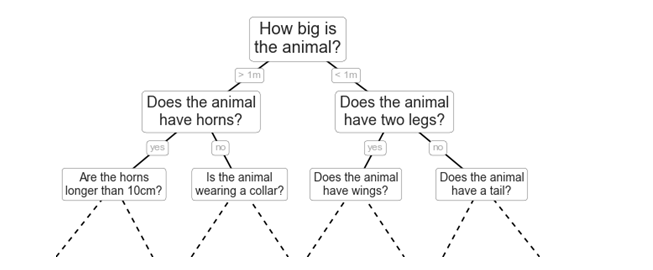

In [11]:
def build_model(X,y):

    learning_rate = 0.2
    no_of_estimators = 200
    max_depth = 3
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)    #here 80% of the dataset is used for training the data and
                                                                                                # 20% of the dataset is used for testing the data.
    model = GradientBoostingClassifier(learning_rate=0.2,n_estimators=no_of_estimators,max_depth=max_depth)  #now build the model
    model.fit(X_train, y_train)     #fit training data. For supervised learning applications, this accepts two arguments: the data X and the labels y
                                    #(e.g. model.fit(X, y)). For unsupervised learning applications, this accepts only a single argument, the data X 
                                    #(e.g. model.fit(X)).
    #for i in range (3):
     # print(y_test)
    return X_train, X_test, y_train, y_test, model

def predict(X_test):
    y_pred = model.predict(X_test)   #given a trained model, predict the label of a new set of data.model.predict takes one input that is X and 
                                     #predicts y(the label)
    #for y in range(3):
     # print(y_pred)
    return y_pred

In [12]:
X = data[['cough','fever','sore_throat','shortness_of_breath','head_ache','age_60_and_above','gender','contact_with_confirmed']]
y = data[['corona_result']]
#X is the columns with the factors we are considering to predict y (the corona result)

# **Testing The Model**

In [13]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, precision_score, classification_report, plot_roc_curve

* accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)
y_true is the correct labels
y_pred is the labels as predicted by the classifier
If normalize is True it will return the percentage of samples classified correctly, if normalize is False it will return the number of samples predicted correctly
* recall_score(y_test,y_train)
Out of all the positive corona cases it will tell how much the model actually identified  as positive. Recall is defined as the ratio of true positives to the sum of true positives and false negatives.What percent of the positive cases did you catch?
* precision score
Precision is defined as the ratio of true positives to the sum of true and false positives.What percent of your predictions were correct?

In [14]:
def metrics(y_test,y_pred):
  accu_score = accuracy_score(y_true=y_test,y_pred=y_pred)
  print("accuracy score is %.2f%%" %(accu_score * 100.0))
  recall = recall_score(y_test,y_pred)
  print("recall score is %.2f%%" %(recall*100.0))
  prec = precision_score(y_test,y_pred)
  print("prec score is %.2f%%" %(prec*100.0))
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

def plot_conf_matrix(y_test,y_pred):
    conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
    print('Confusion matrix:\n', conf_mat)

    labels = ['False', 'True']
    fig = plt.figure()
    ax = fig.add_subplot(111)  # 1x1 grid 1st subplot 
    cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
    fig.colorbar(cax)                           #heat map can be generated for better visualization of the confusion matrix
    ax.set_xticklabels([''] + labels)   #xtick means where the x tick mark for the plot should be
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('Expected')
    plt.show()
    
def classification_report_func(y_test,y_pred,target):   
    report = classification_report(y_test, y_pred,target_names=['False','True'])  #target names are optional display names matching the labels
                                                                                       # (same order).
    return report

def roc_curve(model,X_test,y_test):
    plot_roc_curve(model, X_test, y_test)
    return plot_roc_curve
  

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy score is 97.87%
recall score is 37.27%
prec score is 80.96%
              precision    recall  f1-score   support

       False       0.98      1.00      0.99     27845
        True       0.81      0.37      0.51       856

    accuracy                           0.98     28701
   macro avg       0.90      0.68      0.75     28701
weighted avg       0.98      0.98      0.97     28701

Confusion matrix:
 [[27770    75]
 [  537   319]]


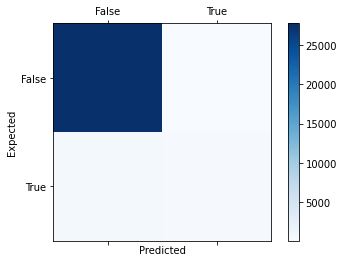

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


<function sklearn.metrics._plot.roc_curve.plot_roc_curve>

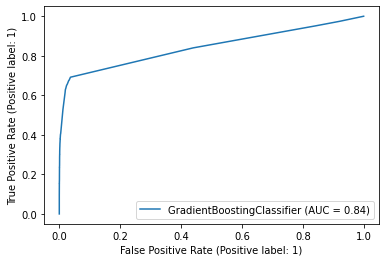

In [15]:
X_train,X_test,y_train,y_test,model = build_model(X,y)
#for i in range(2):
y_pred = predict(X_test)
  #print("y_test and y_pred",y_test,y_pred)
  #print(y_pred)
#for i in range(2):
#  print("y_test and y_pred",y_test,y_pred)
metrics(y_test,y_pred)
#classification_report = classification_report_func(y_test,y_pred,target=['class 0','class 1'])
classification_report = classification_report_func(y_test,y_pred,['False','True'])
print(classification_report)
plot_conf_matrix(y_test,y_pred)
roc_curve(model,X_test,y_test)

* The confusion matrix visualizes the accuracy of a classifier by comparing the actual and predicted classes. 
* classification report will give the model's accuracy,recall etc. 
* ROC curve, also known as Receiver Operating Characteristics Curve, is a metric used to measure the performance of a classifier model. The ROC curve depicts the rate of true positives with respect to the rate of false positives, therefore highlighting the sensitivity of the classifier model.
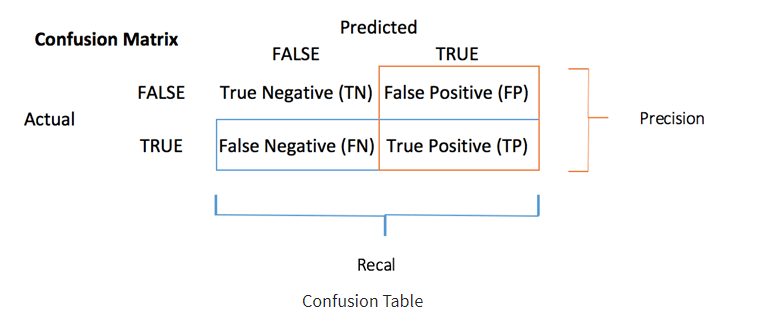

In [16]:
# the recall score is just 37.27% because the model is imbalanced (in the dataset the number of people with a negative corona test exceeds the number of
# people with a positive corona test by a large amount)and the classifier is classifying everything to the false class (showing that the corona
# result of the person is negative)

In [17]:
from pandas import Series
from numpy.random import randn
#pd.DataFrame(data={'predictions': y_pred, 'actual': y_test.flatten()})
#data.head()
df = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred})
df
#index 24 is predicted wrong
#only index 64 is 1



,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
28696,0,0
28697,0,0
28698,0,0
28699,0,0


In [18]:
df.loc[[24]]


,Actual,Predicted
24,1,0


In [19]:
df.loc[[64]]

,Actual,Predicted
64,1,1


# **Reducing The Recall With Random Undersampler**

In [20]:
rus = RandomUnderSampler(random_state = 0)   #random state = 0 means each time we run the notebook we get the same train and test values
                                             #rus is an object of class RandomUnderSampler
X_rus,y_rus = rus.fit_resample(X,y)          #x_rus,y_rus will give the random undersampled x and y
                                             #rus_fit fits the algorithm to your dataset and then transforms(resamples) your dataset with a new 
                                             #undersampled dataset.

* We have randomly removed observations so now we will have equal no of observations in class 0 and class1 ie.the corona result is positive and the corona result is negative class of the dataset.It randomly deletes examples in the majority class.This will balance the dataset.



/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy score is 82.59%
recall score is 69.91%
prec score is 94.23%
Confusion matrix:
 [[805  37]
 [260 604]]


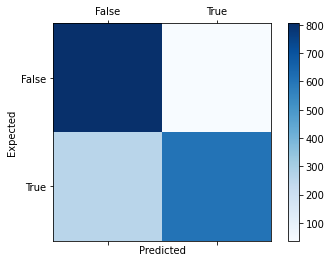

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


<function sklearn.metrics._plot.roc_curve.plot_roc_curve>

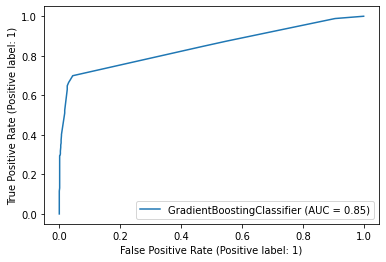

In [21]:
X_train,X_test,y_train,y_test,model = build_model(X_rus,y_rus)
y_pred = predict(X_test)
metrics(y_test,y_pred)
#classification_report = classification_report_func(y_test,y_pred, ['False','True']) #class 0 corresponds to False and class 1 corresponds to True
#print(classification_report)
plot_conf_matrix(y_test,y_pred)
roc_curve(model,X_test,y_test)

In [22]:
print(X.shape)

(143502, 8)


In [23]:
print(X_rus.shape)

(8528, 8)


X_rus.shape gives 8k rows as compared to previous dataset with 140k rows- undersampling majority class


# **Reducing Recall With Cluster Centroid**

In [24]:
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids()   #cc is an object of class clustercetroid
X_clus , y_clus = cc.fit_resample(X[0:40000],y[0:40000]) #notebook may crash if we consider the entire dataset so just take the first 40k rows

/usr/local/lib/python3.7/dist-packages/imblearn/under_sampling/_prototype_generation/_cluster_centroids.py:172: ConvergenceWarning: Number of distinct clusters (43) found smaller than n_clusters (1113). Possibly due to duplicate points in X.
  self.estimator_.fit(_safe_indexing(X, target_class_indices))


Cluster analysis is unsupervised learning algo. We form clusters of similiar samples. Then we remove all the similiar samples from the dataset.

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy score is 92.15%
recall score is 87.12%
prec score is 97.60%
Confusion matrix:
 [[208   5]
 [ 30 203]]


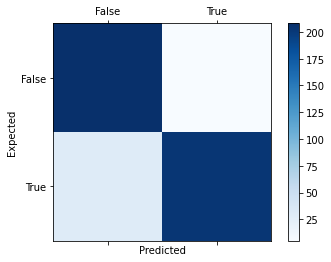

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


<function sklearn.metrics._plot.roc_curve.plot_roc_curve>

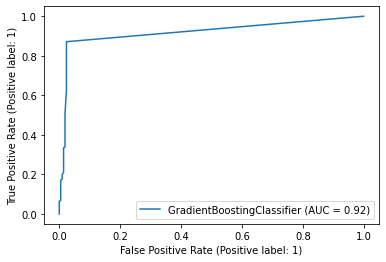

In [25]:
X_train,X_test,y_train,y_test,model = build_model(X_clus,y_clus)
y_pred = predict(X_test)
metrics(y_test,y_pred)
#classification_report = classification_report_func(y_test,y_pred, ['False','True']) #class 0 corresponds to False and class 1 corresponds to True
#print(classification_report)
plot_conf_matrix(y_test,y_pred)
roc_curve(model,X_test,y_test)

In [26]:
print(X.shape)

(143502, 8)


In [27]:
print(X_clus.shape)

(2226, 8)


# **Reducing Recall With SMOTE**

In [28]:
from imblearn.over_sampling import SMOTE
smo = SMOTE()   #smo is an object of class SMOTE
X_smo , y_smo = smo.fit_resample(X,y)

One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model.An improvement on duplicating examples from the minority class is to synthesize new examples from the minority class.

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy score is 83.80%
recall score is 71.27%
prec score is 95.14%
Confusion matrix:
 [[26817  1015]
 [ 8006 19858]]


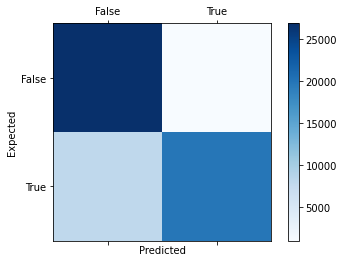

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


<function sklearn.metrics._plot.roc_curve.plot_roc_curve>

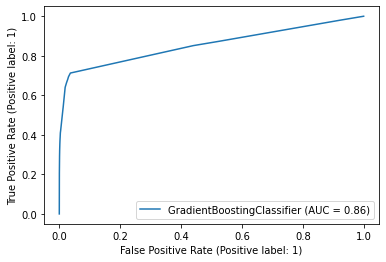

In [29]:
X_train,X_test,y_train,y_test,model = build_model(X_smo,y_smo)
y_pred = predict(X_test)
metrics(y_test,y_pred)
#classification_report = classification_report_func(y_test,y_pred, ['False','True']) #class 0 corresponds to False and class 1 corresponds to True
#print(classification_report)
plot_conf_matrix(y_test,y_pred)
roc_curve(model,X_test,y_test)

In [30]:
print(X.shape)

(143502, 8)


In [31]:
print(X_smo.shape)

(278476, 8)


# **Taking User Input Data**

In [36]:
print("Enter your own data to test the model:")
cough = int(input("Enter cough:"))
fever = int(input("Enter fever:"))
sore_throat = int(input("Enter sore throat:"))
shortness_of_breath = int(input("Enter shortness of breath :"))
head_ache = int(input("Enter head ache:"))
age_60_and_above = int(input("Enter age above 60 or not:"))
gender = int(input("Enter gender:"))
contact_with_confirmed = int(input("Enter contact with confirmed:"))
userInput = [cough, fever, sore_throat, shortness_of_breath, head_ache, age_60_and_above, 
gender, contact_with_confirmed]




Enter your own data to test the model:
Enter cough:1
Enter fever:1
Enter sore throat:1
Enter shortness of breath :1
Enter head ache:1
Enter age above 60 or not:1
Enter gender:1
Enter contact with confirmed:1


In [38]:
result = model.predict([userInput])[0]
#because the model expects multiple inputs (2D array) and returns the prediction for each element (list of observations)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [39]:
print(result)

1
